In [59]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(circlize))
suppressPackageStartupMessages(library(grid))
suppressPackageStartupMessages(library(gridtext))
suppressPackageStartupMessages(library(limma))

In [60]:
samples105 <- read.table("sample105.list")[[1]]
nmf_gt <- read_excel("mmc7.xlsx", sheet = "B) Cluster labels 105 tumors")
nmf_gt <- nmf_gt %>%
  arrange(NMF.consensus, desc(NMF.cluster.membership))
ORDER <- nmf_gt$id 
nmf_clu <- read.table("membership.tsv", sep = "\t", header = TRUE)
nmf_clu <- nmf_clu %>%
    mutate(membership = ifelse(cluster == 1, V1, V2)) %>%
    # TODO: how to sort?
    mutate(sample = factor(sample, levels = ORDER)) %>%
    arrange(sample) %>%
    mutate(cluster = ifelse(cluster==2, 1, 2))
head(nmf_gt,3)
head(nmf_clu,3)


id,NMF.consensus,NMF.cluster.membership
<chr>,<dbl>,<dbl>
C3N-03173,1,1
C3L-01703,1,1
C3N-00709,1,1


,sample,cluster,V1,V2,membership
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,C3N-03173,1,8.920296e-14,1.0000000,1.0000000
2,C3L-01703,1,1.573114e-01,0.8426886,0.8426886
3,C3N-00709,1,6.819578e-02,0.9318042,0.9318042


In [61]:
mut <- read.table("../fig1/data/1c-caseid_kras_vaf_smad4_tp53_cdk2a_mutation_amp_del.tsv", 
        sep ="\t", header = TRUE, na.strings = "NA")
mut <- mut %>% 
    filter(case_id %in% samples105) %>%
    mutate(case_id = factor(case_id, levels = ORDER)) %>%
    arrange(case_id) %>%
    mutate(KRAS = ifelse(is.na(KRAS), "WT", "mut")) %>%
    mutate(TP53 = ifelse(TP53=="WT", "WT", "mut")) %>%
    mutate(CDKN2A = ifelse(CDKN2A=="WT", "WT", "mut")) %>%
    mutate(SMAD4 = ifelse(SMAD4=="WT", "WT", "mut"))

clinical <- read_excel("../fig1/table_s1.xlsx", sheet = "Clinical_data")
clinical <- clinical %>%
    filter(case_id %in% samples105) %>%
    mutate(case_id = factor(case_id, levels = ORDER)) %>%
    arrange(case_id) %>%
    mutate(tumor_site = case_when(
        tumor_site == "body and tail" ~ "tail",
        tumor_site == "head and body" ~ "head",
        tumor_site == "body" ~ "tail",
        TRUE ~ tumor_site
    ))

molecular <- read_excel("../fig1/table_s1.xlsx", sheet = "Molecular_phenotype_data")
molecular <- molecular %>%
    filter(case_id %in% samples105) %>%
    mutate(case_id = factor(case_id, levels = ORDER)) %>%
    arrange(case_id)
head(molecular,4)

case_id,immune_deconv,epithelial_cancer_deconv,stromal_deconv,mature_exocrine_endocrine_deconv,neoplastic_cellularity_histology_estimate,acinar_histology_estimate,islet_histology_estimate,stromal_histology_estimate,Non_neoplastic_duct_histology_estimate,⋯,T cells_MCPCounter,CD8 T cells_MCPCounter,Cytotoxic lymphocytes_MCPCounter,B lineage_MCPCounter,NK cells_MCPCounter,Monocytic lineage_MCPCounter,Myeloid dendritic cells_MCPCounter,Neutrophils_MCPCounter,Endothelial cells_MCPCounter,Fibroblasts_MCPCounter
<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C3N-03173,0.17421558115359501,0.20034928721967701,0.35009375476814703,0.27534137685858101,0.3000000,0.10,0.010000000,0.5300000,0.010000000,⋯,6.769649,6.909976,6.576543,5.625528,2.791733,9.866450,5.181246,7.375782,8.730484,13.63077
C3L-01703,0.33587855660440102,0.13888859176350599,0.39214627947223202,0.13308657215986,0.1500000,0.00,0.050000000,0.7150000,0.000000000,⋯,7.099979,6.933219,6.589589,6.937868,2.729394,10.325936,7.718592,7.048646,9.021355,14.25541
C3N-00709,NA,NA,NA,NA,0.5600000,0.00,0.020000000,0.3600000,0.010000000,⋯,6.427205,6.191761,6.260148,7.487191,2.857593,9.899920,5.155055,7.194550,9.317059,13.51057
C3L-00599,0.29472559090596201,0.212675493392606,0.33765249139777698,0.15494642430365499,0.2666667,0.05,0.006666667,0.6033333,0.006666667,⋯,6.783249,6.262148,6.598287,8.115005,2.849261,9.166441,6.986818,7.158694,8.964621,14.02192


In [67]:
collisson_rpr <- read.table("rna_subtyping_collisson.tsv", header=T)
collisson_rpr <- collisson_rpr %>%
    filter(sample %in% samples105) %>%
    mutate(sample = factor(sample, levels = ORDER)) %>%
    arrange(sample)
# head(collisson_rpr,4)
collisson_rpr


sample,cluster,subtype
<fct>,<int>,<chr>
C3N-03173,1,exocrine-like
C3L-01703,2,classical
C3N-00709,2,classical
C3L-00599,1,exocrine-like
C3L-01051,1,exocrine-like
C3N-00249,2,classical
C3L-02115,1,exocrine-like
C3L-01971,1,exocrine-like
C3L-02116,2,classical


In [63]:
zscores <- read.table("filtered_zscores.tsv", sep="\t", header =TRUE)
    # mutate(case_id = factor(case_id, levels = ORDER)) %>%
    # arrange(case_id) %>%
ORDER2 <- gsub("-", ".", ORDER)
# zscores_val <- zscores[,3:ncol(zscores)] %>%
#    select(all_of(ORDER2), everything())
zscores <- zscores %>%
    select(setdiff(names(zscores), ORDER2),all_of(ORDER2))
head(zscores,2)

,data_type,names,C3N.03173,C3L.01703,C3N.00709,C3L.00599,C3L.01051,C3N.00249,C3L.02115,C3L.01971,⋯,C3N.01714,C3N.03666,C3L.02897,C3N.02971,C3L.03628,C3L.01037,C3N.00302,C3N.04126,C3N.03853,C3L.00102
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cnv,AARS2,-0.3056396,-0.3295512,1.902110,-0.08914669,0.5691428,0.09216947,-0.001316827,-0.3224638,⋯,0.04424658,-0.05688598,0.03284489,0.005688446,-0.008987176,-0.2286227,0.247533,-0.06361761,0.149194,-0.02331466
2,cnv,ABCC10,-0.3056396,-0.3295512,1.678629,-0.08914669,0.9884450,0.09216947,-0.001316827,-0.3224638,⋯,0.04424658,-0.05688598,0.03284489,0.005688446,-0.008987176,-0.2286227,0.247533,-0.06361761,0.149194,-0.02331466


`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



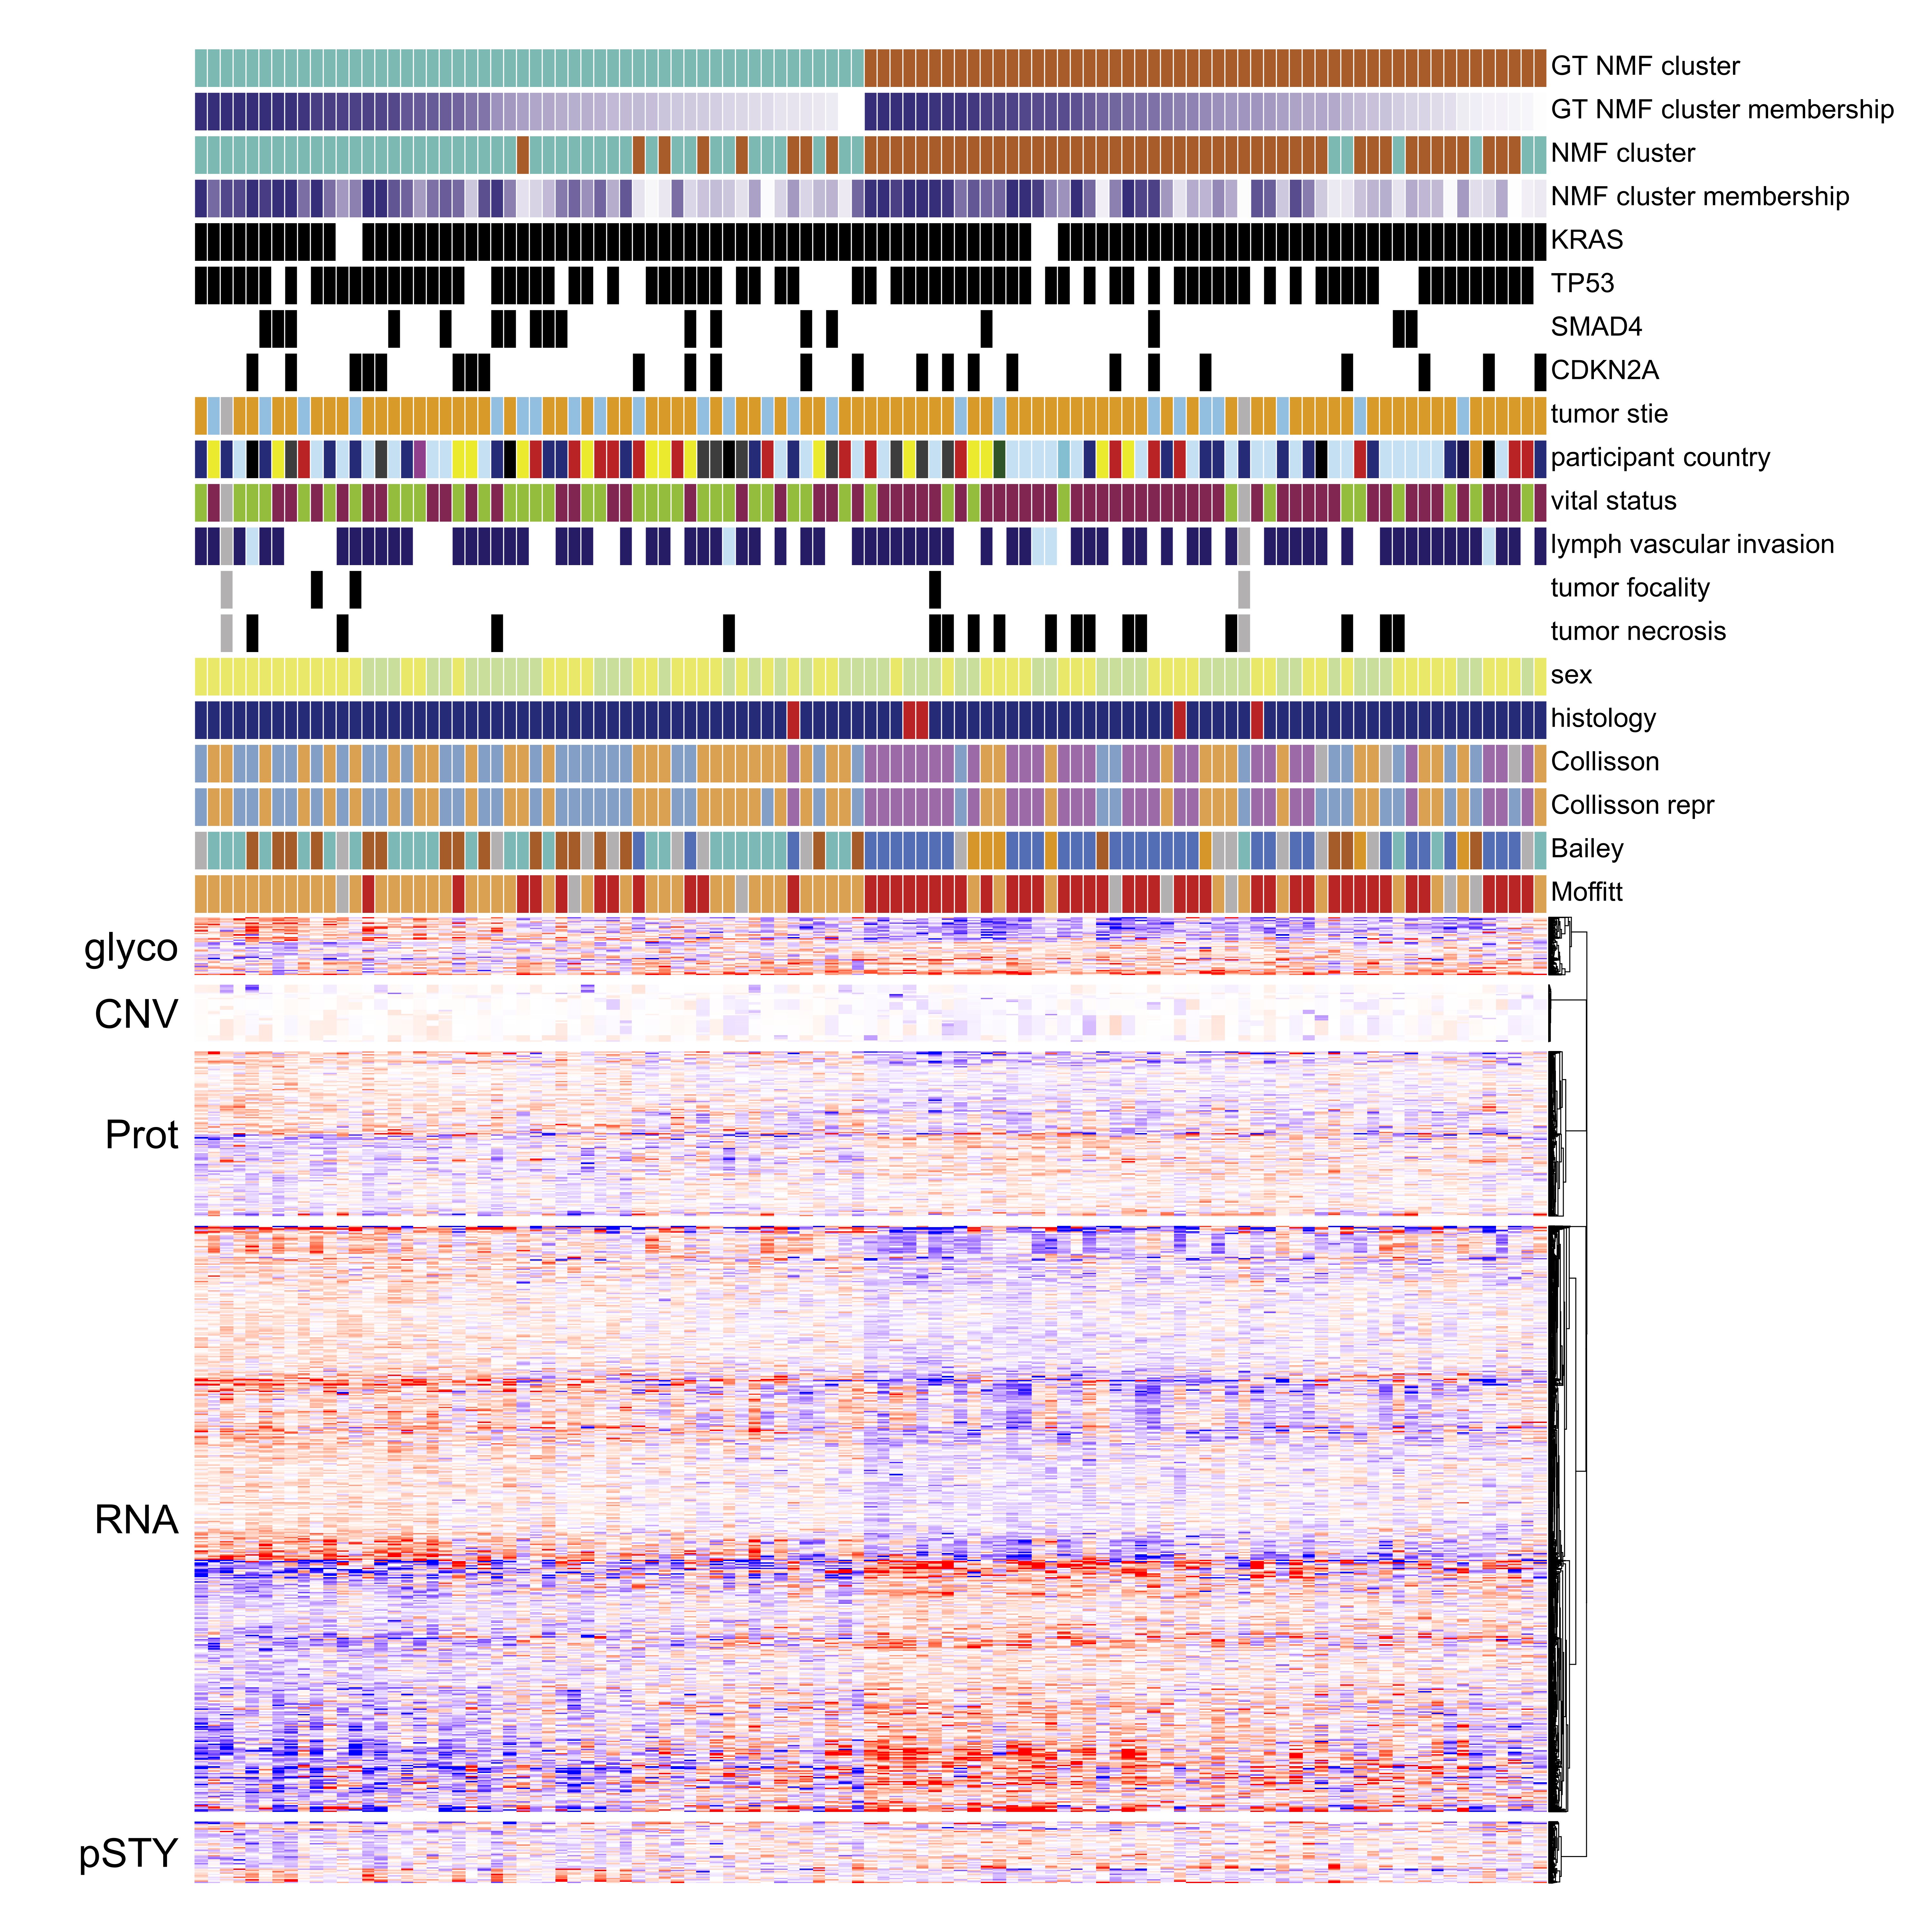

In [66]:
options(repr.plot.width=20, repr.plot.height=20, repr.plot.res = 300)

ANNO_H <- 0.4
ANNO_G <- 0.05
anno_simple_default <- function(x, col) {
    anno_simple(
        x, col = col,
        border = FALSE, gp = gpar(col="white", lwd =1)
    )
}

heatmap_default <- function(mat, name) {
    hm_col = colorRamp2(c(-4,0, 4), c("red", "white", "blue"))
    Heatmap(mat, name =name, row_title = name, col = hm_col, 
        show_column_names = FALSE,
        cluster_columns =  FALSE, show_heatmap_legend = FALSE, row_dend_side = "right"
    ) 
}

### Color themes
NA_COL <- "#B2B0B1"
clu_col <- c("1"="#7DB9B3", "2" = "#A85C2A")
membership_col <- colorRamp2(c(0.5,1), c("white", "#362E79"))
mut_col <- c("WT"="white", "mut"="black")
tumor_col <- c("head" = "#D89A29", "tail" = "#92BFE0", "NA" = NA_COL)
country_col <- c(
    "United States"= "#252B77", "Bulgaria" = "#2E5428", "Canada"="#ECEA2E", "China"="#B92325", "Denmark"="#D7972B",
    "Iraq"="#1D1853", "Poland"="#C5E0F3", "Russia"="#000000", "Serbia"="#84BFD1", "South Wales"="#903F8C", "Other"="#3D3D3D"
)
vital_col <- c("Deceased"= "#812651", "Living"="#94BD3D", "NA"=NA_COL)
lymph_col <- c("Indeterminate"="#C5E0F3", "Present"="#261C65", "Not identified"="white", "NA"=NA_COL)
focal_col <- c("Unifocal"="white", "Multifocal"="black", "NA"=NA_COL)
necro_col <- c("Not identified"="white", "Present"="black", "NA"=NA_COL)
sex_col <- c("Male"="#EAE868", "Female"="#C8DE9A")
hist_col <- c("PDAC"="#252B77", "Adenosquamous carcinoma"="#B92325")
collisson_col <- c("quasimesenchymal"="#9C6AA7", "exocrine-like"="#839FC5", "classical"="#DAA152", "NA"=NA_COL)
bailey_col <- c("squamous"="#546EB5", "immunogenic"="#D6962A", "pancreatic progenitor"="#7CB8B6", "NA"=NA_COL, "ADEX"="#A55C29")
moffitt_col = c("BASAL-LIKE"="#B92525", "CLASSICAL"="#DAA152", "NA"=NA_COL)
hm_col = colorRamp2(c(-4,0, 4), c("red", "white", "blue"))

### Heatmap annotation
cnt_anno <- 20
anno <- HeatmapAnnotation(
    NMF_cluster_gt = anno_simple_default(nmf_gt$NMF.consensus, clu_col),
    NMF_membership_gt = anno_simple_default(nmf_gt$NMF.cluster.membership, membership_col),

    NMF_cluster = anno_simple_default(nmf_clu$cluster, clu_col),
    NMF_cluster_membership = anno_simple_default(nmf_clu$membership, membership_col),
    KRAS = anno_simple_default(mut$KRAS, mut_col),
    TP53 = anno_simple_default(mut$TP53, mut_col),
    SMAD4 = anno_simple_default(mut$SMAD4, mut_col),
    # MUC4 = anno_simple(mut$MUC4, col = mut_col, border = FALSE), # TODO
    # CTNNA2 = anno_simple(mut$CTNNA2, col = mut_col, border = FALSE), #TODO
    CDKN2A = anno_simple_default(mut$CDKN2A, mut_col),
    tumor_site = anno_simple_default(clinical$tumor_site, tumor_col),
    participant_country = anno_simple_default(clinical$participant_country, country_col),
    vital_status = anno_simple_default(clinical$vital_status, vital_col),
    lymph_vasicular_invasion = anno_simple_default(clinical$lymph_vascular_invasion, lymph_col),
    tumor_focality = anno_simple_default(clinical$tumor_focality, focal_col),
    tumor_necrosis = anno_simple_default(clinical$tumor_necrosis, necro_col),
    sex = anno_simple_default(clinical$sex, sex_col),
    histology =  anno_simple_default(clinical$histology_diagnosis, hist_col),
    
    # xcell_cluster =  anno_simple_default(clinical$histology_diagnosis, hist_col), # TODO

    Collisson =  anno_simple_default(molecular$Collisson, collisson_col),
    Collisson_rpr = anno_simple_default(collisson_rpr$subtype, collisson_col),
    Bailey =  anno_simple_default(molecular$Bailey, bailey_col),
    Moffitt =  anno_simple_default(molecular$Moffitt, moffitt_col),
    # methylation_cluster =  anno_simple_default(molecular$Moffitt, moffitt_col), # TODO

    annotation_label = gt_render(
        c("GT NMF cluster", "GT NMF cluster membership", "NMF cluster" , "NMF cluster membership",
        "KRAS", "TP53", "SMAD4", "CDKN2A", "tumor stie", "participant country", "vital status",
        "lymph vascular invasion", "tumor focality", "tumor necrosis", "sex","histology",
        "Collisson", "Collisson repr", "Bailey", "Moffitt"),
        gp = gpar(fontsize = 20)
    ),

    show_legend = rep(FALSE, cnt_anno),
    annotation_height = unit(rep(ANNO_H, cnt_anno), "in"),
    gap = unit(rep(ANNO_G, cnt_anno), "in")
)
### Draw heatmap
# z-score matrices
mat <- as.matrix(zscores[,3:ncol(zscores)])
row_map = c("cnv" = "CNV", "rna" = "RNA", "prot" = "Prot", "glyco" = "glyco", "psty"="pSTY")
hm <- Heatmap(
    mat,
    top_annotation = anno,
    col = hm_col, 
    cluster_columns = FALSE, show_column_names = FALSE, 
    show_heatmap_legend = FALSE, row_dend_side = "right", show_parent_dend_line = FALSE,
    row_title_gp = gpar(fontsize = 30), row_title_rot = 0, row_gap = unit(0.1, "in"),
    row_split = factor(zscores$data_type, levels = c("cnv", "rna", "prot", "glyco","psty")),
    row_title = "@{row_map[ x[1] ]}",
    cluster_rows = TRUE,
    width = unit(14,"in"), height = unit(10,"in")
)

draw(hm,
    padding = unit(c(0,-1,0,0), "in")    
)

### Heatmap